# TDW 3311 Lab Assignment

### Group Name: TechTitans
#### Group Members:
- LIM FANG WEI (1211306646)
- HOW SHUE KEI (1201103432)	
- KOW WAN XUAN (1211307650)	
- HO JUN WEI (1211306530)

##  Part 1- Data Cleaning and Transformation (20 Marks)

You will be working with a dataset containing various data quality issues, such as missing data, outliers, unstructured data, and more. Your task is to clean, preprocess, and transform the data to make it suitable for visualisation or further analysis and modeling. Please perform the following tasks using <u>Dataset1</u> 


In [1]:
#Dataset read
import pandas as pd
import numpy as np

df1 = pd.read_csv('Dataset1.csv', header = 0)
display(df1.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### 1.1 Missing Data Handling (3 Marks)
- Identify the columns with missing values and decide on an appropriate strategy to handle them.


In [2]:
#Identify columns with missing values
print(f"Number of missing values before dropping missing data:\n{df1.isnull().sum()}\n")

Number of missing values before dropping missing data:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64



In [3]:
#Check rows with NA values.
display(df1[df1.isna().any(axis=1)])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


- Implement the chosen method to fill or drop missing data.

In [4]:
#Drop the missing data
#Note: There are known to be NaN when number_of_reviews = 0. 
#Hence dropping such rows only if the number_of_reviews is not 0.

df1 = df1.dropna(subset = ['name', 'host_name'])
for i in range(df1.shape[0]):
    if df1.iloc[i]['number_of_reviews'] > 0 and df1.iloc[i]['last_review'] == np.nan:
        df1.iloc[i].drop()

#Check whether the missing data has been dropped successfully or not 
print(f"Number of missing values after dropping missing data:\n{df1.isnull().sum()}")

Number of missing values after dropping missing data:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64


#### 1.2 Outliers Detection and Treatment (3 Marks)

- Explore the data to identify potential outliers using box plot, scatter plot and so on.

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore

C:\Users\Fang\AppData\Local\Temp\ipykernel_4628\3890422463.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  box_plot.show()


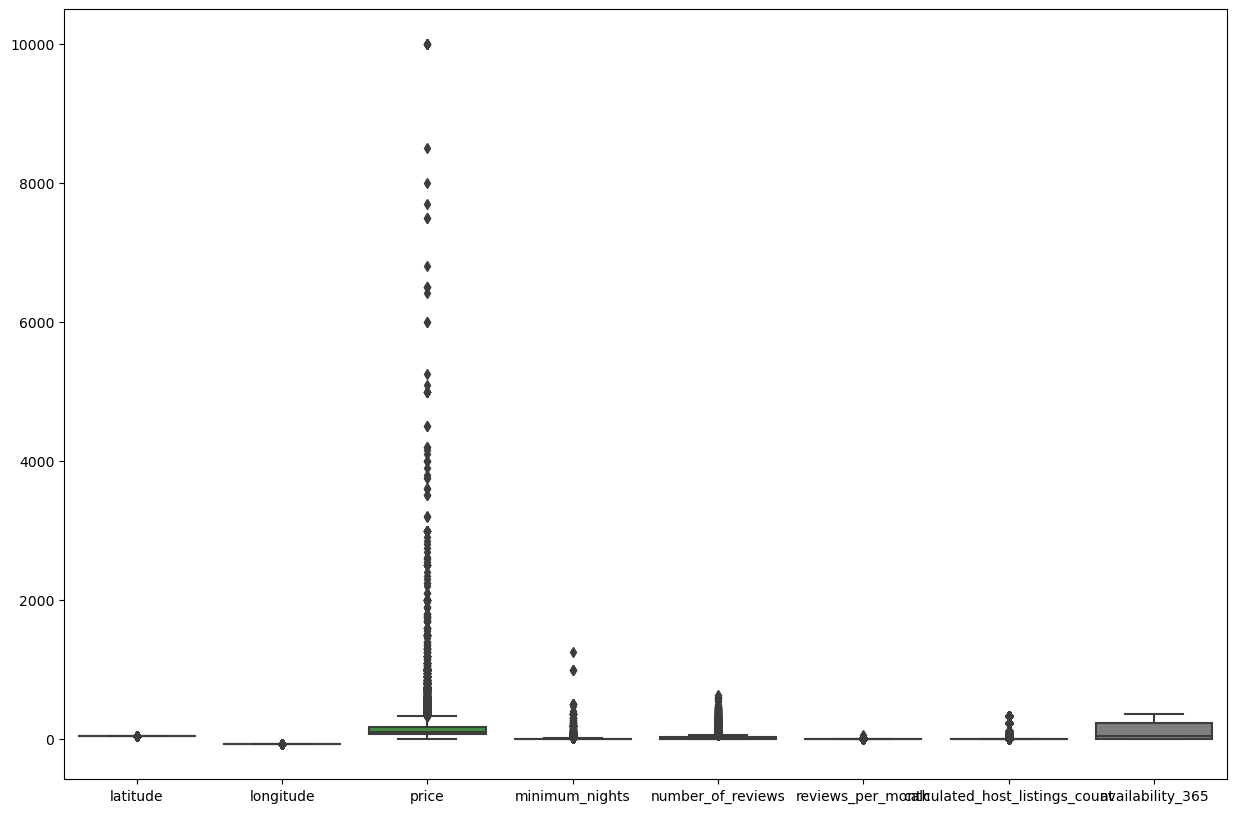

In [6]:
# Creating Box Plot
exclude_columns=['id','host_id']

box_plot = plt.figure(figsize = (15,10))
columns_to_include = [col for col in df1.columns if col not in exclude_columns]
sns.boxplot(df1[columns_to_include])

box_plot.show()

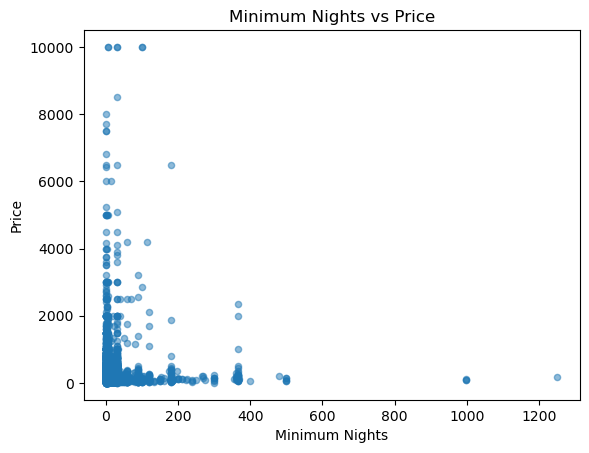

In [7]:
#Scatter plot(Minimum Nights vs Price)

df1.plot(kind='scatter', x='minimum_nights',y='price',alpha = .5 )
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Minimum Nights vs Price')

plt.show()

array([[<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'reviews_per_month'}>, <Axes: >]],
      dtype=object)

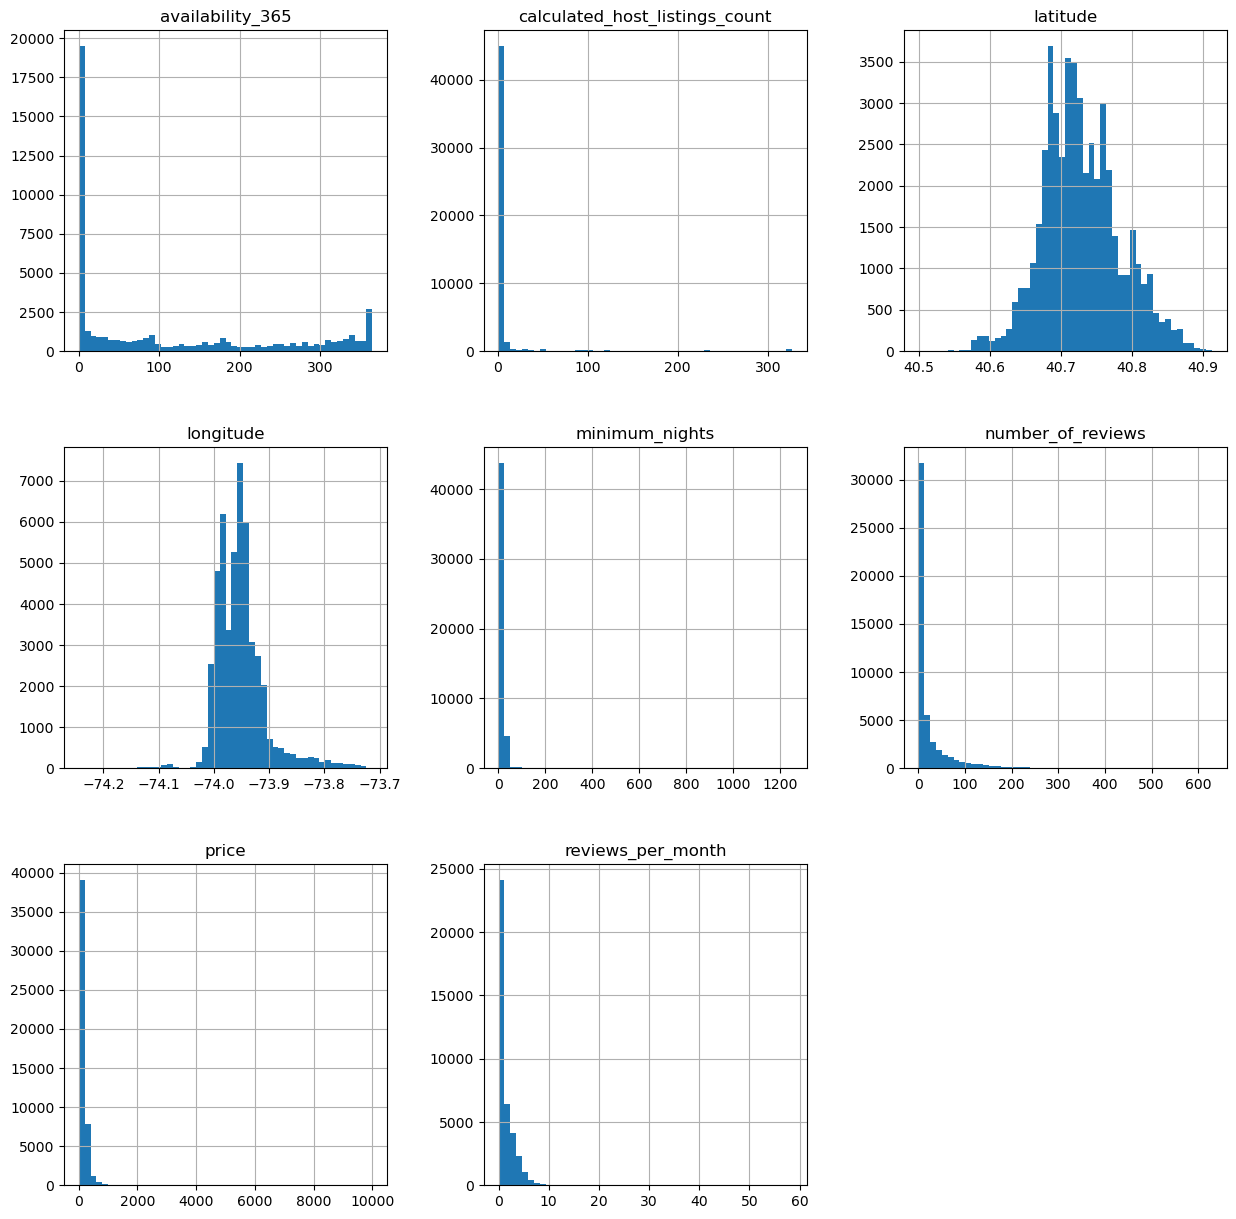

In [8]:
# Histograms
df1.loc[:, df1.columns.difference(exclude_columns)].hist(figsize=(15,15), bins = 50)

- Decide on an outlier treatment strategy and apply it to the dataset.

In [9]:
# List outliers which prices has abs(z)-scores that exceeds 3.
df1['Z_price'] = zscore(df1.price)
display(df1[(abs(df1['Z_price']) > 3)])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Z_price
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0,7.689549
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297,4.775673
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365,11.852227
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NaN,NaN,1,0,4.775673
1414,634353,Luxury 1Bed with Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77428,-73.98594,Entire home/apt,1000,30,44,2015-09-28,0.53,11,364,3.526870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48301,36186719,Private Bedroom in the Heart of Chelsea!,268920555,Terrence Jake,Manhattan,Chelsea,40.74531,-73.99454,Private room,999,30,0,NaN,NaN,1,270,3.522707
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NaN,NaN,1,222,11.848065
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NaN,NaN,1,270,7.685386
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,NaN,1,349,5.062898


In [10]:
# List dataframe without outliers.
df1_noOutliers = df1[(abs(df1['Z_price']) <= 3)]
display(df1_noOutliers)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Z_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.015570
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.300794
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,-0.011407
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,-0.265330
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,-0.302795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,-0.344421
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,-0.469302
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,-0.157101
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,-0.406862


C:\Users\Fang\AppData\Local\Temp\ipykernel_4628\2111542139.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  box_plot.show()


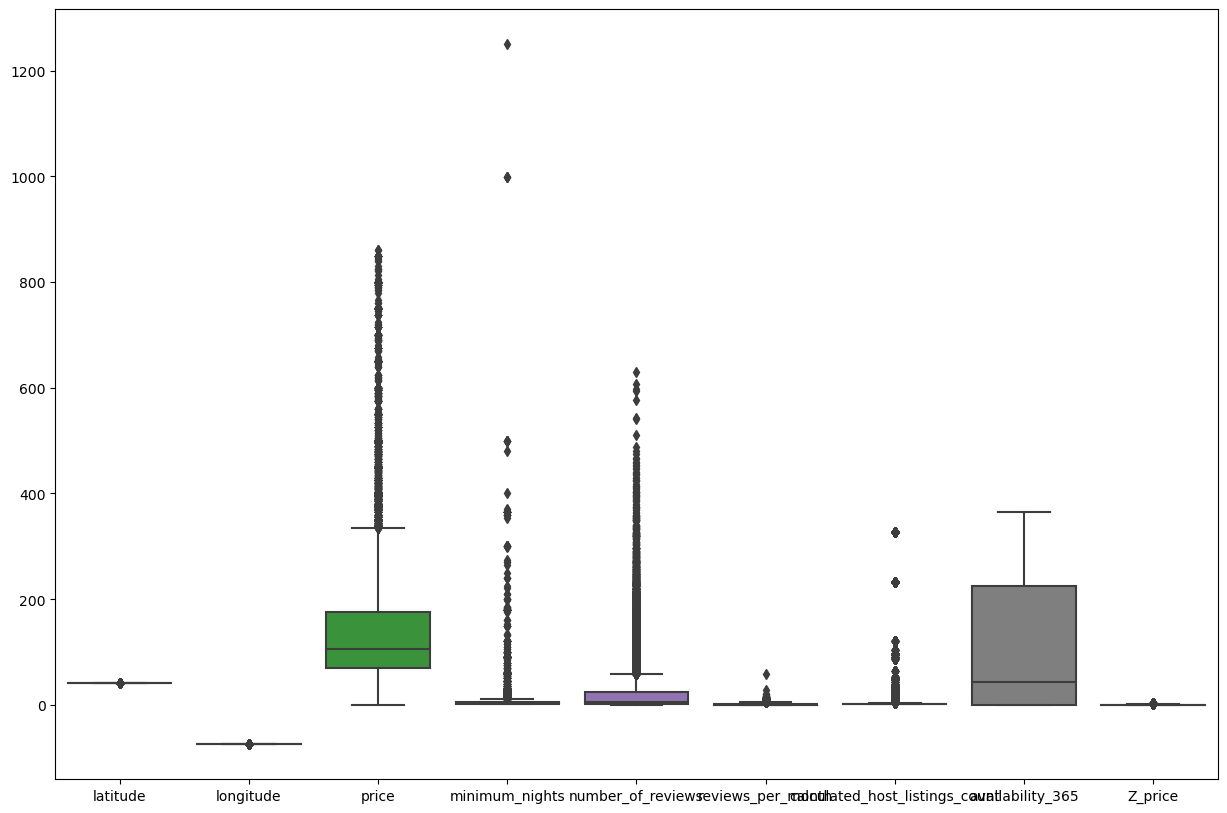

In [11]:
#Creating box plot
box_plot = plt.figure(figsize = (15,10))
columns_to_include = [col for col in df1.columns if col not in exclude_columns]
sns.boxplot(df1_noOutliers[columns_to_include])
box_plot.show()

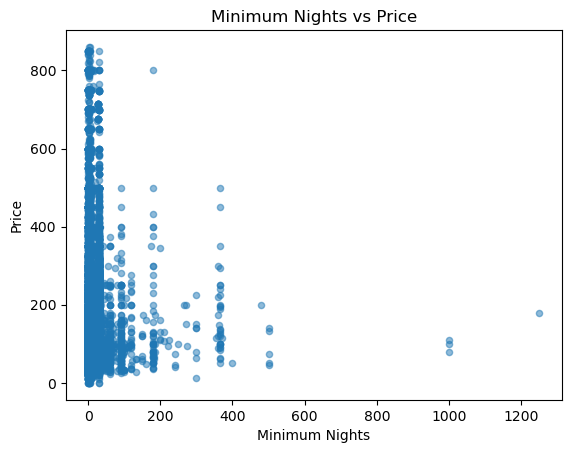

In [12]:
#Scatter plot(Minimum Nights vs Price)

df1_noOutliers.plot(kind='scatter', x='minimum_nights',y='price',alpha = .5 )
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Minimum Nights vs Price')

plt.show()

array([[<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'reviews_per_month'}>, <Axes: >]],
      dtype=object)

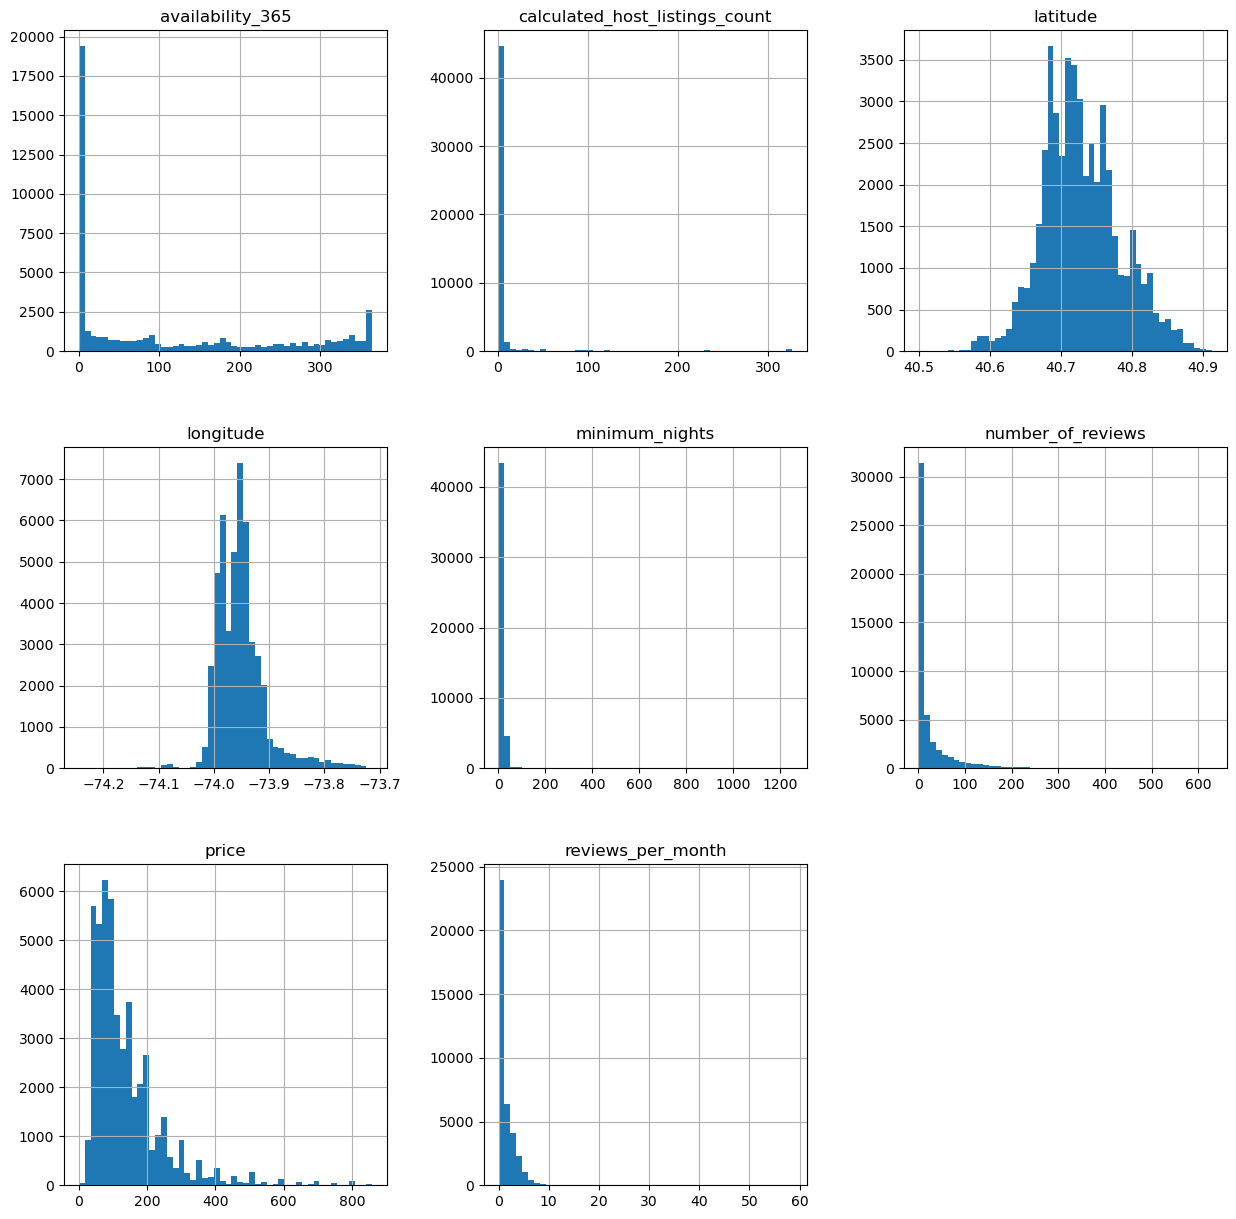

In [13]:
#Show all graphs after removing outlier
exclude_columns = ['id', 'host_id', 'Z_price']
df1_noOutliers.loc[:, df1_noOutliers.columns.difference(exclude_columns)].hist(figsize=(15,15), bins = 50)

#### 1.3 Data Transformation (14 Marks)
- Select only '`Private room`' listings in '`Manhattan`' neighborhood and save it to `data_sub1`.


In [14]:
# Select only 'Private room' listings in 'Manhattan' neighborhood.
data_sub1 = df1[(df1['neighbourhood_group'] == "Manhattan") & (df1['room_type'] == "Private room")]
data_sub1.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Z_price
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,-0.011407
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,-0.306957
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,-0.306957
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39,-0.281981
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333,-0.281981
17,7322,Chelsea Perfect,18946,Doti,Manhattan,Chelsea,40.74192,-73.99501,Private room,140,1,260,2019-07-01,2.12,1,12,-0.053034
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0,-0.302795
28,9518,"SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM",31374,Shon,Manhattan,Inwood,40.86482,-73.92106,Private room,44,3,108,2019-06-15,1.11,3,311,-0.452651
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355,-0.427675
31,9704,Spacious 1 bedroom in luxe building,32045,Teri,Manhattan,Harlem,40.81305,-73.95466,Private room,52,2,88,2019-06-14,1.42,1,255,-0.419350


- Filter `data_sub1` to include only listings with 3 minimum number of nights and sort the data according to `Price`.


In [15]:
#Filter to include only listings with 3 minimum number of nights and sort the data according to `Price`.
data_sub1[data_sub1['minimum_nights'] == 3].sort_values(by=['price'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Z_price
28019,21893604,Private Bedroom in West Village/Chelsea,1144452,Dante,Manhattan,Chelsea,40.74045,-74.00047,Private room,12,3,8,2019-06-07,0.59,1,37,-0.585857
21143,16778904,"Quiet cozy apartment, air-conditioned room",111433024,Danielle,Manhattan,Washington Heights,40.84353,-73.94201,Private room,25,3,34,2019-05-31,1.46,1,139,-0.531742
11091,8583175,Big Bedroom in Manhattan with an Artist,28272799,Este,Manhattan,Harlem,40.82855,-73.94033,Private room,29,3,27,2018-12-19,0.59,1,0,-0.515091
13775,10368714,Martha's Apartment,53369750,Martha,Manhattan,Washington Heights,40.83790,-73.94095,Private room,30,3,119,2019-06-30,3.19,1,3,-0.510928
27033,21394087,The Hideaway Upstairs,145242566,Corey,Manhattan,Harlem,40.81807,-73.95487,Private room,30,3,86,2019-06-24,4.32,2,0,-0.510928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23624,19114014,"Large, Private Carriage House in West Village",683230,Thomas,Manhattan,West Village,40.73444,-73.99967,Private room,950,3,36,2019-07-01,1.45,3,237,3.318736
43130,33467371,"Private, Beautiful Upper Eastside Townhome",683230,Thomas,Manhattan,Upper East Side,40.76725,-73.95864,Private room,950,3,11,2019-06-30,4.23,3,251,3.318736
20819,16489149,2 BDRM PRESIDENTIAL LUXURY CONDO MIDTOWN 45 N...,69545883,Chayla,Manhattan,Midtown,40.75373,-73.97272,Private room,999,3,1,2017-09-11,0.05,12,365,3.522707
20094,16087406,2 BDRM Presidential Reserve at Wyndham Midtown 45,69545883,Chayla,Manhattan,Midtown,40.75368,-73.97358,Private room,1599,3,2,2017-06-09,0.08,12,365,6.020314


- Create `data_sub2` where each row represents a unique combination of `neighbourhood_group` and `room_type` with average price for each combination.


In [16]:
# Create data subset where row represents a unique combination of `neighbourhood_group` and `room_type` with average price for each combination.
data_sub2 = df1.groupby(['neighbourhood_group', 'room_type']).agg({'price':'mean'})
display(data_sub2)

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.645503
                    Private room      66.788344
                    Shared room       58.610169
Brooklyn            Entire home/apt  178.362609
                    Private room      76.510619
                    Shared room       50.527845
Manhattan           Entire home/apt  249.238211
                    Private room     116.805594
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.776855
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

- Create a new column indicating high-demand area `(availability_365 > 300)`, calculate the revenue for each listing `(revenue = price * minimum_nights)` and display the dataframe.


In [17]:
# Create new column if not exist, where indicating bool of high-demand area and calculate revenue for each listing.
if 'high_demand' not in df1.columns:
  df1.insert(df1.shape[1], 'high_demand', df1['availability_365'] > 300)

if 'revenue' not in df1.columns:
  df1.insert(df1.shape[1], 'revenue', df1['price']*df1['minimum_nights'])

df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Z_price,high_demand,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.015570,True,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.300794,True,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,-0.011407,True,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,-0.265330,False,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,-0.302795,False,800


- Bin the '`price`' column into categories (e.g., budget, moderate, expensive) based on price ranges.


In [18]:
bins = np.linspace(df1['price'].min(), df1['price'].max(),4)
print(bins)

# Using qcut for binning price column as using normal cut will have not balanced categories (shown by the .linspace). 
labels = ['budget','moderate','expensive']
df1['bins'] = pd.qcut(df1['price'], q=3, labels = labels, precision = 1)
display(df1)

[    0.          3333.33333333  6666.66666667 10000.        ]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Z_price,high_demand,revenue,bins
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.015570,True,149,moderate
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.300794,True,225,expensive
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,-0.011407,True,450,moderate
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,-0.265330,False,89,moderate
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,-0.302795,False,800,budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,-0.344421,False,140,budget
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,-0.469302,False,160,budget
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,-0.157101,False,1150,moderate
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,-0.406862,False,55,budget


- Calculate summary statistics (e.g., mean, median) for the 'price' column based on neighbourhood_group and room_type. Display the summary statistics for '`price`'.


In [19]:
# Summary statistics for 'price' column based on `neighbourhood_group` and `room_type`, then summary statistics for overall.
price_summary = df1.groupby(['neighbourhood_group', 'room_type']).agg({'price':['mean', 'median', 'std']})
display(price_summary)

display(df1['price'].describe())

price                   
                                           mean median         std
neighbourhood_group room_type                                     
Bronx               Entire home/apt  127.645503  100.0   95.114513
                    Private room      66.788344   53.5  107.009071
                    Shared room       58.610169   40.0  102.251046
Brooklyn            Entire home/apt  178.362609  145.0  226.480672
                    Private room      76.510619   65.0  124.764826
                    Shared room       50.527845   36.0   53.444485
Manhattan           Entire home/apt  249.238211  191.0  331.938262
                    Private room     116.805594   90.0  190.292709
                    Shared room       88.977083   69.0   92.416534
Queens              Entire home/apt  147.050573  120.0  129.383208
                    Private room      71.776855   60.0  180.559348
                    Shared room       69.020202   37.0  171.000607
Staten Island       Entire home/apt  173.846591  100.0  394.600216
                    Private room      62.292553   50.0   36.138245
                    Shared room       57.444444   30.0   45.119594

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- Group the data by neighbourhood_group and calculate the average '`availability_365`'. Display the average '`availability_365`' for each '`neighbourhood_group`'.

In [20]:
# Grouping data by `neighbourhood_group` and calculate average `availability_365`.
average_availability = df1.groupby(['neighbourhood_group']).agg({'availability_365':'mean'})
display(average_availability)

,availability_365
neighbourhood_group,
Bronx,165.704316
Brooklyn,100.235801
Manhattan,112.013445
Queens,144.487288
Staten Island,199.678284
